In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import pickle

%matplotlib inline

In [2]:
datasets = [i for i in os.listdir() if 'xlsx' in i]
datasets

['df_mds.xlsx', 'df_pca.xlsx', 'df_mds_sampled.xlsx', 'df_mds_3D.xlsx']

In [3]:
pca = pd.read_excel('df_pca.xlsx')
mds_2d = pd.read_excel('df_mds.xlsx')
mds_3d = pd.read_excel('df_mds_3D.xlsx')

In [4]:
pca.columns

Index(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'left'], dtype='object')

In [5]:
import itertools

In [6]:
stuff = [i for i in pca.columns if 'p_' in i]
c = list(itertools.combinations(stuff, 2))
unq = set(c)
list(unq)

[('p_0', 'p_3'),
 ('p_0', 'p_4'),
 ('p_0', 'p_2'),
 ('p_2', 'p_3'),
 ('p_3', 'p_4'),
 ('p_1', 'p_3'),
 ('p_1', 'p_4'),
 ('p_1', 'p_2'),
 ('p_0', 'p_1'),
 ('p_2', 'p_4')]

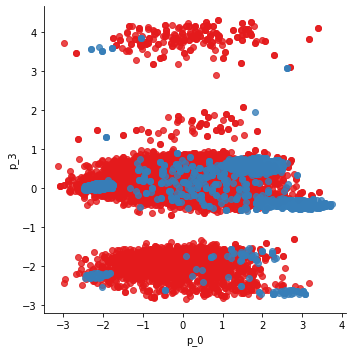

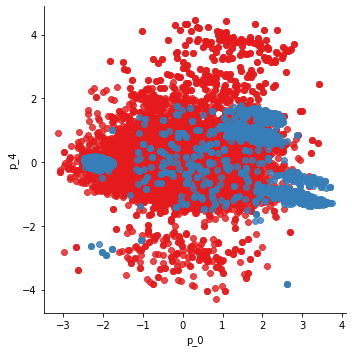

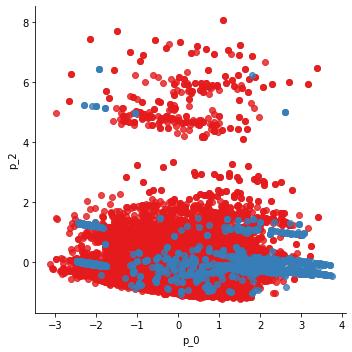

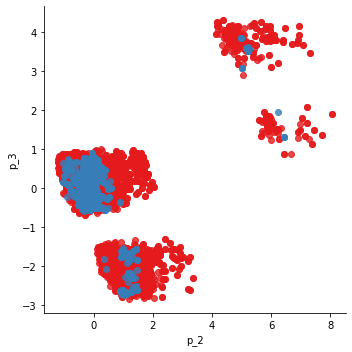

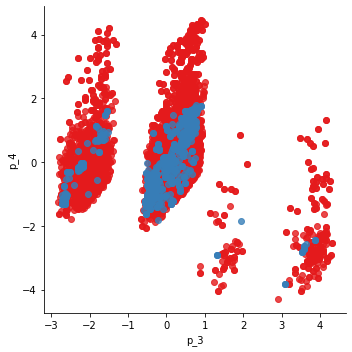

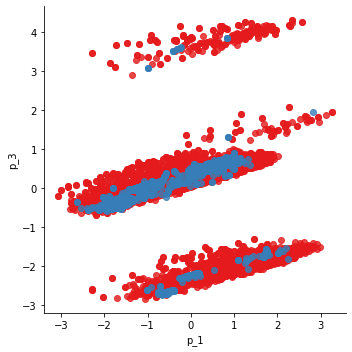

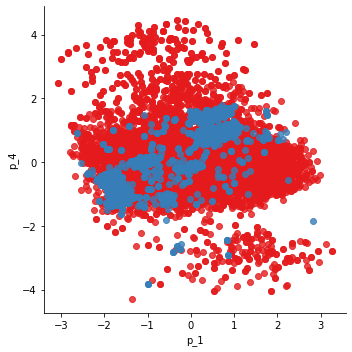

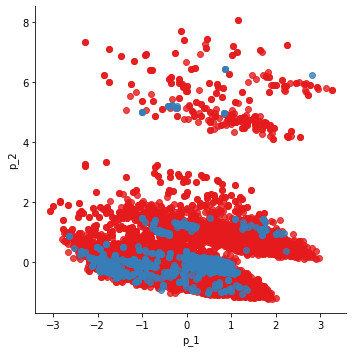

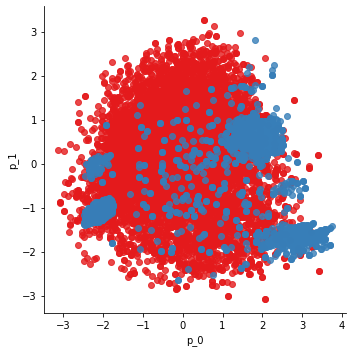

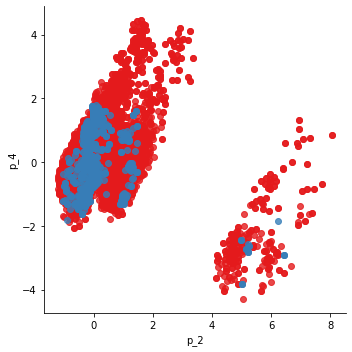

In [7]:
for i in list(unq):
    sns.lmplot( x=i[0], y=i[1], data=pca, fit_reg=False, hue='left', legend=False, palette="Set1")

In [8]:
mds_2d.head()

d_1       d_2  left
0 -0.492494 -0.374196  True
1  0.207710  0.567135  True
2 -0.331097  0.962120  True
3  0.106387  0.428989  True
4 -0.505953 -0.375591  True

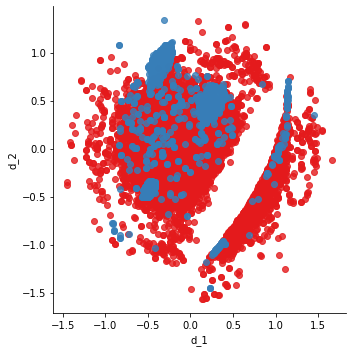

In [9]:
sns.lmplot( x='d_1', y='d_2', data=mds_2d, fit_reg=False, hue='left', legend=False, palette="Set1")

In [10]:
mds_3d.head()

d_1       d_2       d_3   left
0  0.441140 -0.782012 -0.165272  False
1 -0.128819 -0.180050 -0.695218  False
2 -0.235798  0.296075  0.481259  False
3 -0.461977 -0.242592 -0.297906  False
4  0.072965  0.504627 -0.086788  False

In [11]:
import plotly.express as px
fig = px.scatter_3d(mds_3d, x='d_1', y='d_2', z='d_3',
              color='left')
fig.show()

In [12]:

fig = px.scatter_3d(pca, x='p_0', y='p_1', z='p_2',
              color='left')
fig.show()

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='left', ylabel='d_1'>

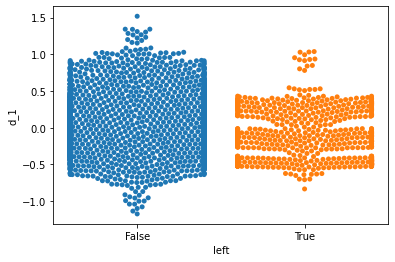

In [13]:
sns.swarmplot(x="left", y="d_1", data=mds_3d)

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='left', ylabel='d_2'>

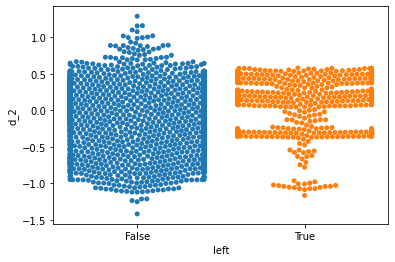

In [14]:
sns.swarmplot(x="left", y="d_2", data=mds_3d)

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='left', ylabel='d_3'>

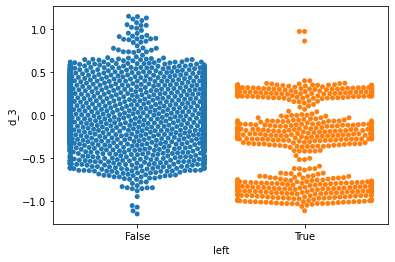

In [15]:
sns.swarmplot(x="left", y="d_3", data=mds_3d)

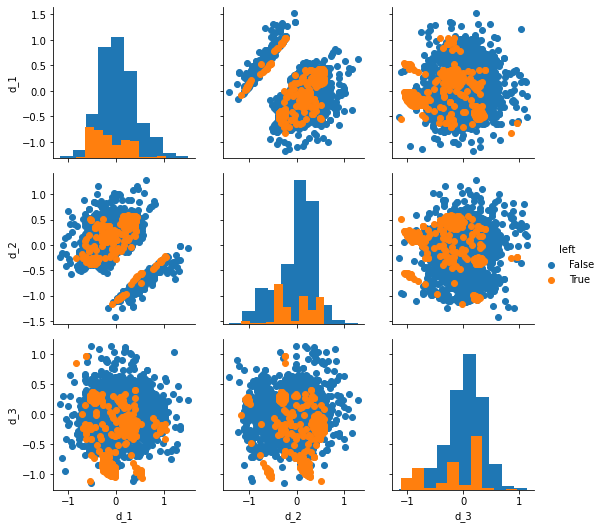

In [16]:
g = sns.PairGrid(mds_3d, hue="left")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

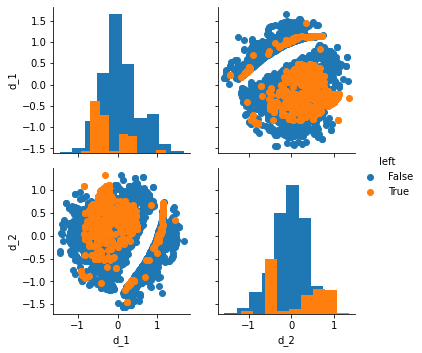

In [17]:
g = sns.PairGrid(mds_2d, hue="left")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

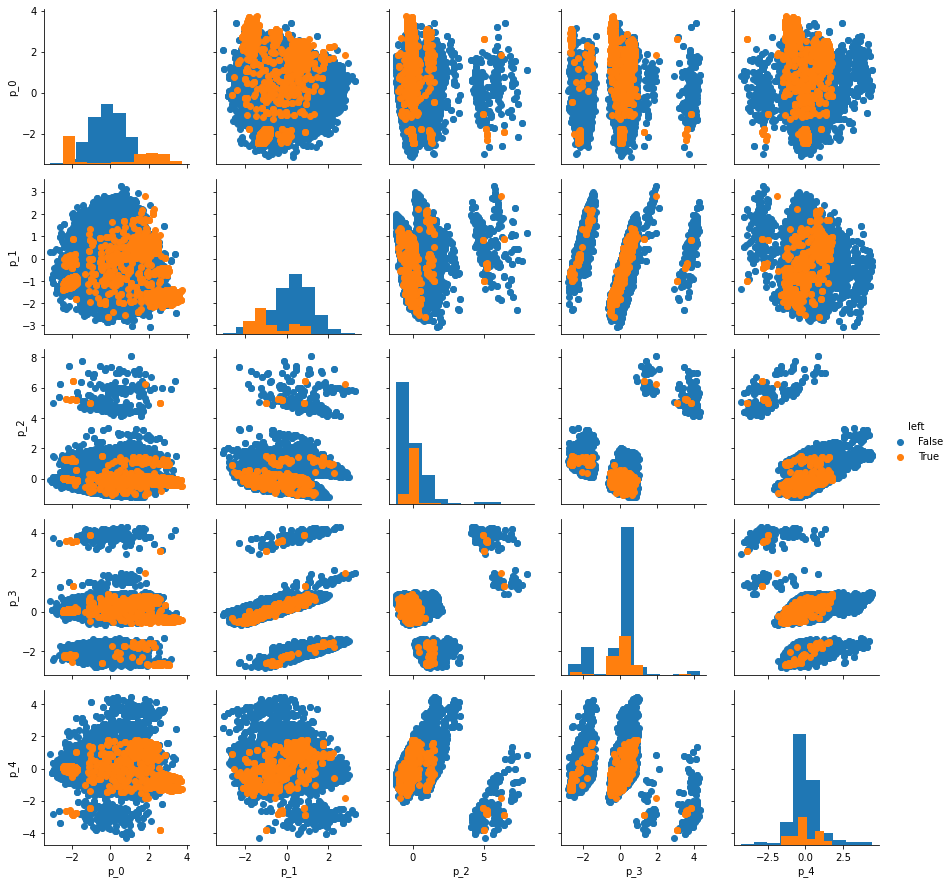

In [18]:
g = sns.PairGrid(pca, hue="left")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();